In [8]:
%pylab inline
import pandas
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.misc import derivative
from scipy.optimize import bisect

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/chap7/"+filename, bbox_inches="tight", dpi=600)
    return

Populating the interactive namespace from numpy and matplotlib


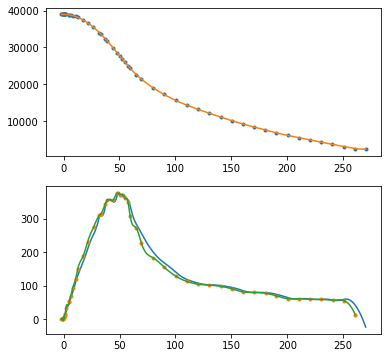

In [130]:
# Baumgartner data at https://www.youtube.com/watch?v=raiFrxbHxV0
# Reprendre la lecture de la vidéo pour obtenir h(t)

folder = "../images/chap7/"
filename = folder + "data_baumgartner.xlsx"
df = pandas.read_excel(filename, sheet_name="data", names=["t", "h"])

t = np.ndarray.astype(np.array(df["t"]), float)
h = np.ndarray.astype(np.array(df["h"]), float)

t_int = np.linspace(min(t),max(t),1000)
f = interp1d(t, h, kind='cubic')
h_int = f(t_int)
#h_int = savgol_filter(h_int, 51, 1)

t_vit = t_int[:-1]
v = np.diff(h_int)/np.diff(t_int)

plt.figure(figsize=(6,6))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

ax1.plot(t,h, ".")
ax1.plot(t_int, h_int)

ax2.plot(t_vit,-v)

f = interp1d(t[:-1], np.diff(h)/np.diff(t), kind='cubic')
t_int = np.linspace(min(t), max(t[:-1]),1000)
v = f(t_int)
ax2.plot(t[:-1], -np.diff(h)/np.diff(t), ".")
ax2.plot(t_int, -v)

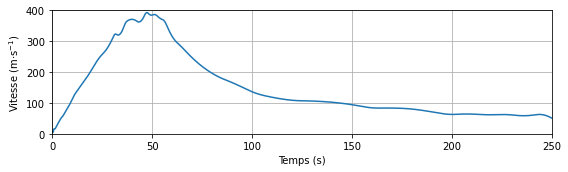

In [13]:
x, y = t_int[:-1], -np.diff(h_int)/np.diff(t_int)
plt.figure(figsize=(8,2.5))
plt.plot(x, y)
plt.xlim(0,250)
plt.ylim(0,400)
plt.grid()
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m$\cdot$s$^{-1}$)")

mysavefig("baumgartner.pdf")

x_fit, y_fit = [], []
for i in range(len(x)):
    if x[i] < 35:
        x_fit.append(x[i])
        y_fit.append(y[i])
params = np.polyfit(x_fit, y_fit, 1)
a, b = params[0], params[1]
#plt.plot(x,a*x+b)

1.8414056604360667

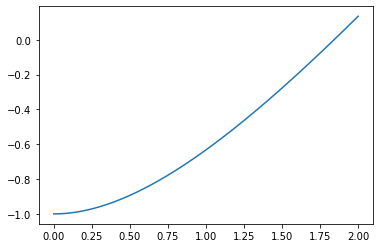

In [9]:
# équation transcendante
v = 1
tau = 1
h = 1
def z(t):
    return v*t + v*tau*(np.exp(-t/tau) - 1) - h

t = np.linspace(0,2,1000)
plt.plot(t, z(t))

t1 = 1.75
t2 = 2
bisect(z,t1,t2)

# Ascension d'un bulle

0.0006203504908994003

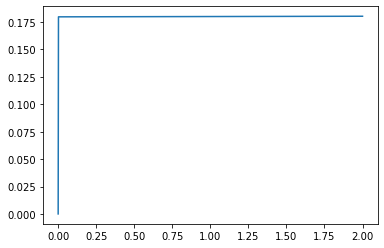

In [127]:
from scipy.integrate import odeint

rho_air = 1    # masse volumique de l'air
rho_eau = 1e3  # masse volumique de l'eau
g       = 9.81 # accélération de la pesanteur
P0      = 1e5  # pression atmosphérique 1 atm
eta     = 1e-3 # viscosité dynamique de l'eau

V0      = 1e-9 # volume de la bulle juste sous la surface

def bulle(X,t):
    z, v = X
    V = P0*V0 / (P0 - rho_eau*g*z)
    r = (3*V/4/np.pi)**(1/3)
    m = rho_air * V0
    stokes = - 6*np.pi*eta * r * v
    drag   = - 1/2 * rho_eau * np.pi*r**2 * .4 * v**2 
    dz = v
    dv = 1 / m * ( rho_eau*g*V + drag )
    return [dz,dv]

t = np.linspace(0,2,1000)
CI = [-10,0]
V = odeint(bulle,CI,t)
z = V[:,0]
v = V[:,1]

plt.plot(t,v)
#plt.ylim(-5.5,0)

(3*V0/4/np.pi)**(1/3)

In [123]:
z = -10
P0 / (P0 - rho_eau*g*z)


0.5047955577990914

In [ ]:
def H(omega):
    return 1 / (2 + 1j*omega)

omega = np.logspace(-3,3,1000)
plt.plot(omega, np.abs(H(omega)))

In [129]:
np.arctan(np.sqrt(3))/np.pi

0.33333333333333337